# 1.2 Aan de slag met de Fashion MNIST dataset

In dit labo gaan we aan de slag met de __Fashion MNIST dataset__ die afbeeldingen van in totaal __70 000 Zalando artikelen__ bevat. 
</br>De afbeeldingen zijn in __grijswaarde, 28x28 pixels groot__, en kunnen aan één van de __10 klassen__ toegewezen worden.
</br>Meer info: https://github.com/zalandoresearch/fashion-mnist

We ontwikkelen in deze Jupyter Notebook een neuraal netwerk dat voorspelt tot welke categorie elk artikel behoort. 
</br>Deze notebook is deels ingevuld, het is dan ook de bedoeling dat je deze zelf aanvult waar dit aangegeven staat (zowel de commando's als in tekstvorm). 

## Importeren van libraries

In [4]:
import datetime
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Importeer TensorFlow om aan de slag te gaan. Zorg ervoor dat je TensorFlow minstens versie 2.0.0 is.

In [6]:
import tensorflow as tf
print("TensorFlow version:",tf.__version__)

TensorFlow version: 2.18.0


## Laden van de dataset

We maken gebruik van de __Fashion MNIST dataset__. Deze kunnen we rechtstreeks downloaden via TensorFlow.

In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist

We laden de dataset in. Standaard worden via <code>load_data()</code> 60 000 trainingexamples en 10 000 testexamples ingeladen.

In [11]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


De data omvat afbeeldingen in __grijswaarden__, waarbij elke pixel een waarde aanneemt tussen 0 (zwart) en 255 (wit). 

__De labels van deze dataset:__ 0: T-shirt/top. 1: Broek. 2: Pullover. 3: Jurk. 4: Jas. 5: Sandaal. 6: Shirt. 7: Sneaker. 8: Tas. 9: Enkellaars. 

In [14]:
print("Dataset overzicht:")
print(f"Trainingsset grootte: {x_train.shape[0]} voorbeelden")
print(f"Testset grootte: {x_test.shape[0]} voorbeelden")
print(f"Afbeelding dimensies: {x_train.shape[1]}x{x_train.shape[2]} pixels")

Dataset overzicht:
Trainingsset grootte: 60000 voorbeelden
Testset grootte: 10000 voorbeelden
Afbeelding dimensies: 28x28 pixels


Nu kunnen we de dataverdeling plotten:

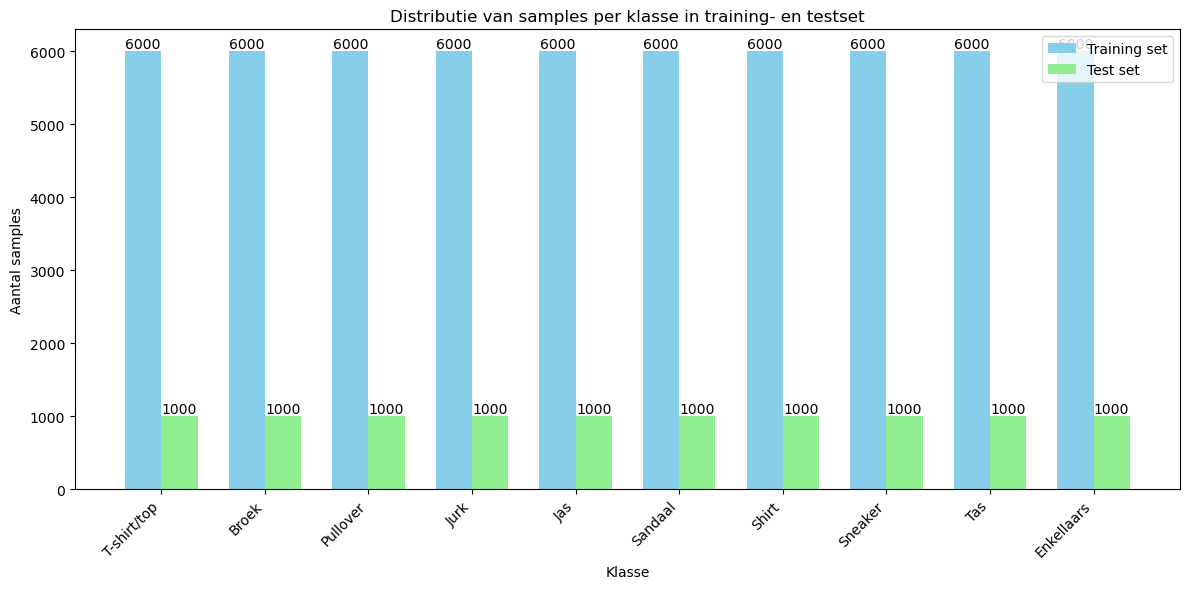


Aantal samples per klasse:
T-shirt/top  - Training:  6000, Test:  1000
Broek        - Training:  6000, Test:  1000
Pullover     - Training:  6000, Test:  1000
Jurk         - Training:  6000, Test:  1000
Jas          - Training:  6000, Test:  1000
Sandaal      - Training:  6000, Test:  1000
Shirt        - Training:  6000, Test:  1000
Sneaker      - Training:  6000, Test:  1000
Tas          - Training:  6000, Test:  1000
Enkellaars   - Training:  6000, Test:  1000


In [16]:
# Plot distributie van samples per klasse
plt.figure(figsize=(12, 6))

# Labels definiëren
class_names = ['T-shirt/top', 'Broek', 'Pullover', 'Jurk', 'Jas',
               'Sandaal', 'Shirt', 'Sneaker', 'Tas', 'Enkellaars']

# Tel samples per klasse
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)

# Maak een bar plot
x = np.arange(len(class_names))
width = 0.35

plt.bar(x - width/2, train_counts, width, label='Training set', color='skyblue')
plt.bar(x + width/2, test_counts, width, label='Test set', color='lightgreen')

# Voeg labels en titel toe
plt.xlabel('Klasse')
plt.ylabel('Aantal samples')
plt.title('Distributie van samples per klasse in training- en testset')
plt.xticks(x, class_names, rotation=45, ha='right')
plt.legend()

# Voeg aantallen toe boven elke bar
for i, count in enumerate(train_counts):
    plt.text(i - width/2, count, str(count), ha='center', va='bottom')
for i, count in enumerate(test_counts):
    plt.text(i + width/2, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print ook de exacte aantallen
print("\nAantal samples per klasse:")
for i, name in enumerate(class_names):
    print(f"{name:12} - Training: {train_counts[i]:5d}, Test: {test_counts[i]:5d}")

## Bekijken van de dataset

Vooraleer we ons model opstellen of gaan trainen is het belangrijk dat we weten hoe onze data eruit ziet. Daarom plotten we de __eerste 25 training examples__ uit onze dataset:

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


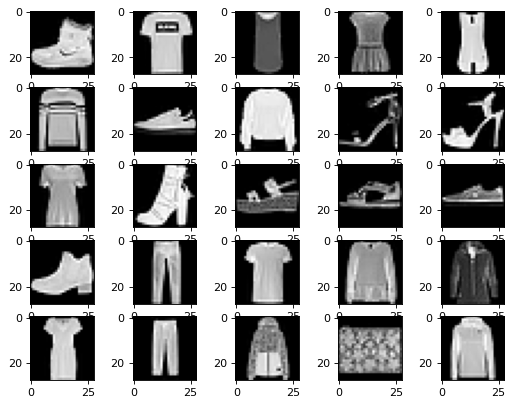

In [19]:
figure(figsize=(8, 6), dpi=80)

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(25):
	pyplot.subplot(5, 5, i+1)
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
    
pyplot.show()

In [20]:
'''
TODO: normaliseer de data zodat elke pixel een waarde heeft binnen het interval [0,1] in plaats van [0,255] Dit zal toelaten efficienter te leren.
'''
x_train, x_test = x_train / 255.0, x_test / 255.0

## Bouwen van een ML model

We maken een model door het __opeenstapelen van verschillende lagen__ via het <code>Sequential Model</code>

In [23]:
'''
TODO: 
De inputlaag is reeds gegeven. Dit zal praktisch altijd een laag zijn van het type Flatten, aangezien we een afbeelding in matrixvorm willen omzetten naar een vector.

Implementeer vervolgens een hidden Dense laag met 128 neuron en de RELU activatiefunctie voor deze laag. 

Voorzie als laatste laag ook de juiste classificatielaag. Denk daarbij aan het aantal nodige neuronen in die laag.
https://www.tensorflow.org/api_docs/python/tf/keras/layers
'''

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # brengen van de input naar 1 dimensie
  tf.keras.layers.Dense(128, activation='relu'), # implementeert de operatie: output = activation(dot(input,kernel) + bias). Activation is de activatiefunctie, kernel zijn de gewichten, bias = bias vector.
  tf.keras.layers.Dense(10, activation='sigmoid')
])

C:\Users\frede\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


We kunnen ons model bekijken door het <code>model.summary()</code> commando. 
- In de eerste kolom vind je de laag en het type terug (Flatten = input, Dense = fully connected,..). 
- De tweede kolom geeft de output shape terug. Van de input weten we dat dit 784 is (28x28 pixels). Als je *None* ziet staan, wil dit zeggen dat deze dimensie niet vast staat. </br>Dit laat toe om bijvoorbeeld een variabel aantal trainingsexamples te gebruiken (aangezien dit niet als een constante in je model staat gedefinieerd).
- De derde kolom geeft het aantal parameters weer. Voor de eerste hidden laag is dit bijvoorbeeld 785 (28x28 pixels + 1 bias term) x 128 (aantal neuronen in die laag) = 100480.

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

__We hebben ons model opgesteld, maar op dit model is dit nog niet getraind.__ Toch kunnen we er al voorspellingen op uitvoeren, al zal ons dit nog geen zinnige voorspellingen geven. De gewichten van ons model zijn namelijk willekeurig toegekend. Bij wijze van oefening gaan we toch eens een voorspelling doen van een trainingsexample. Dit kan met <code>model.predict()</code>.

In [27]:
# Voorspelling van het eerste trainingsexample. We moeten eerst onze example reshapen zodat deze de juiste dimensies heeft
example_nr = 2
train_example = np.expand_dims(x_train[example_nr], axis=0)
prediction = model.predict(train_example)
print(prediction)

# Weetje: je kan ook een voorspelling doen door rechtstreeks je trainingsexample aan je model te voeden. Dit zou dus hetzelfde resultaat moeten geven als bovenstaand commando.
prediction = model(train_example)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
[[0.5929638  0.5036762  0.42558217 0.4237788  0.4785427  0.52253747
  0.39594516 0.4699997  0.46273917 0.4837543 ]]
tf.Tensor(
[[0.5929638  0.5036762  0.42558208 0.4237787  0.47854275 0.5225374
  0.39594507 0.46999973 0.4627392  0.4837543 ]], shape=(1, 10), dtype=float32)


Voor elke example zal ons model __een vector teruggeven van scores__. Deze scores geven een probabiliteit terug dat een example tot een bepaalde klasse behoort. </br>

Als output zie je een rij met die __10 elementen telt__. Deze waarden stellen de probabiliteiten voor dat het voorbeeld tot een klasse behoort. De tweede waarde in deze vector is dus de probabiliteit dat ons trainingsexample tot klasse 1 (= Trouser) behoort.

bijbehorend label weergeven. Door de <code>softmax</code> functie toe te passen, kunnen we deze reeks reële getallen omzetten in een vector waarvan de waarden liggen tussen 0 en 1, met als eigenschap dat de som van alle elementen gelijk is aan 1. Deze aanpak bevordert een snellere convergentie tijdens het trainingsproces.

De <code>softmax</code> functie kunnen we oproepen dmv <code>tf.nn.softmax</code>. In onderstaand voorbeeld geven we onze net bekomen prediction vector mee, waarna deze wordt omgezet naar een softmax vector:

In [32]:
print(tf.nn.softmax(prediction).numpy())

[[0.11225106 0.10266285 0.09495054 0.09477947 0.10011473 0.10461757
  0.09217778 0.09926309 0.098545   0.10063785]]


## Definieren van de loss functie

Vooraleer we ons netwerk gaan trainen, moeten we natuurlijk aangeven hoe we gaan meten hoe goed onze voorspellingen zijn.
De loss functie van ons netwerk geeft aan hoe ver onze voorspelling ligt van de echte waarde. Afhankelijk van ons probleem (regressie of classificatie) hebben we keuze tussen verschillende functies. 

In [35]:
'''
TODO: Definieer de juiste loss functie voor voor ons probleem. 

Tip 1: bekijk ook de theorieslides waar je terugvindt welke lossfunctie kan gebruiken voor dit type probleem
Tip 2: https://www.tensorflow.org/api_docs/python/tf/keras/losses


'''
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy() # from_logits=True geeft aan dat de outputs van het model nog niet genormaliseerd zijn (dus geen softmax toegevoegd)
# https://datascience.stackexchange.com/questions/73093/what-does-from-logits-true-do-in-sparsecategoricalcrossentropy-loss-function

Het ongetrainde model geeft willekeurige probabilities. Gemiddelde zijn we 1/10 keer juist (er zijn 10 klassen, dus gemiddeld gokken we 1/10 goed).
</br>Hierdoor ligt de initiele loss rond <code>tf.math.log(1/10) = 2.3.</code>

In [37]:
print(loss_fn(tf.expand_dims(y_train[example_nr], 0), prediction).numpy())


1.8538549


Vooraleer we ons model gaan trainen kan worden, moet het model __gecompileerd__ worden. Stel de juiste, door jou net gekozen loss functie in:

In [39]:
'''
TODO: kies een geschikte optimizer
Tip 1: theorieslides
Tip 2: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
'''
optimizer = 'adam'

Kies vervolgens ook de metric waarop je wil evalueren.

In [41]:
'''
TODO: kies een geschikte evaluatiemetric.
Tip: https://www.tensorflow.org/api_docs/python/tf/keras/metrics
'''

metric = ['accuracy']
model.compile(optimizer = optimizer, loss = loss_fn, metrics = metric)

## Trainen en evalueren van het model

Het is zover! We kunnen ons model nu gaan trainen (= <code>fitten</code>). Het zal daarbij gebruik maken van de gecompileerde model, dat een voorstelling is van ons model, onze optimizer, de lossfunctie, en de evaluatiemetric.

Aan de hand van <code>Model.fit</code> kunnen we het model fitten. Achter de schermen minimaliseren we de loss en passen we de parameters aan (= gewichten).

In [45]:
'''
TODO: fit het model op de trainingsdata over 5 epochs.
Tip: https://www.tensorflow.org/api_docs/python/tf/keras/Model
'''
history = model.fit(x_train, y_train, epochs = 5) # epoch = aantal volledige passes van de volledige trainingset

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7823 - loss: 0.6269
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8628 - loss: 0.3791
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8770 - loss: 0.3361
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8820 - loss: 0.3176
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8912 - loss: 0.2965


Ons model is getraind op de trainingsdata, maar uiteraard zijn we geïnteresseerd in hoe het presteert op examples die het nog niet heeft gezien. Daarom evalueren we het model op de __validatie of test set__.

In [47]:
model.evaluate(x_test, y_test, verbose = 1) #verbose 1 geeft toons ons ook de progressie

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8784 - loss: 0.3375


[0.34282657504081726, 0.8774999976158142]

In [48]:
# Fit het model op de trainingsdata én valideer na elke epoch op de testdata
# Dit geeft directe feedback over mogelijke overfitting en hoe goed het model generaliseert 
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8969 - loss: 0.2797 - val_accuracy: 0.8774 - val_loss: 0.3366
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9043 - loss: 0.2598 - val_accuracy: 0.8836 - val_loss: 0.3232
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9089 - loss: 0.2490 - val_accuracy: 0.8800 - val_loss: 0.3348
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9104 - loss: 0.2401 - val_accuracy: 0.8863 - val_loss: 0.3331
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9114 - loss: 0.2335 - val_accuracy: 0.8814 - val_loss: 0.3329


We kunnen vervolgens eenvoudiger voorspellingen uitlezen door de __softmax in te bouwen.__ Dit is opnieuw een model, dat ons oorspronkelijke model als het ware encapsuleert.

In [50]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

*Opmerking:* </br>Je zou er natuurlijk ook voor kunnen kiezen om je softmax meteen in je model in te bouwen wanneer je het initialiseert via de <code>Sequential</code> klasse. In dat geval heb je twee opties: 
- Je definieert de softmax activatiefunctie door dit als parameter aan te geven bij de reeds bestaande laatste Dense laag: <code>tf.keras.layers.Dense(10, activation = 'softmax')</code>
- Je wijzigt niets aan je laatste Dense laag, maar voegt de softmax als nieuwe, laatste laag in het model toe: <code>tf.keras.layers.Softmax()</code>. In dit geval heb je dus een Dense laag, gevolgd door een softmax laag.

De drie besproken opties zullen hetzelfde resultaat opleveren.  

We kunnen vervolgens voorspellingen doen (hier voor het eerste voorbeeld in onze testset):

De echte (ground trurth) waarde van dit voorbeeld:

In [54]:
test_example_y = (np.expand_dims(y_test[1],0))
print("De echte waarde die hoort bij het eerste trainingsexample:", test_example_y[0])

De echte waarde die hoort bij het eerste trainingsexample: 2


De voorspelling van ons netwerk. Merk op dat we hier ook de <code>model.predict()</code> zouden kunnen gebruiken. 
</br>Omdat we werken met een softmax functie, moeten we de waarde uit de rij halen met de hoogste waarde. Dit kan door <code>np.argmax()</code>

In [56]:
test_example_prediction = (np.expand_dims(x_test[1],0))
prediction = probability_model(test_example_prediction)
print("De voorspelde waarde die hoort bij het eerste testexample:", np.argmax(prediction))

De voorspelde waarde die hoort bij het eerste testexample: 2


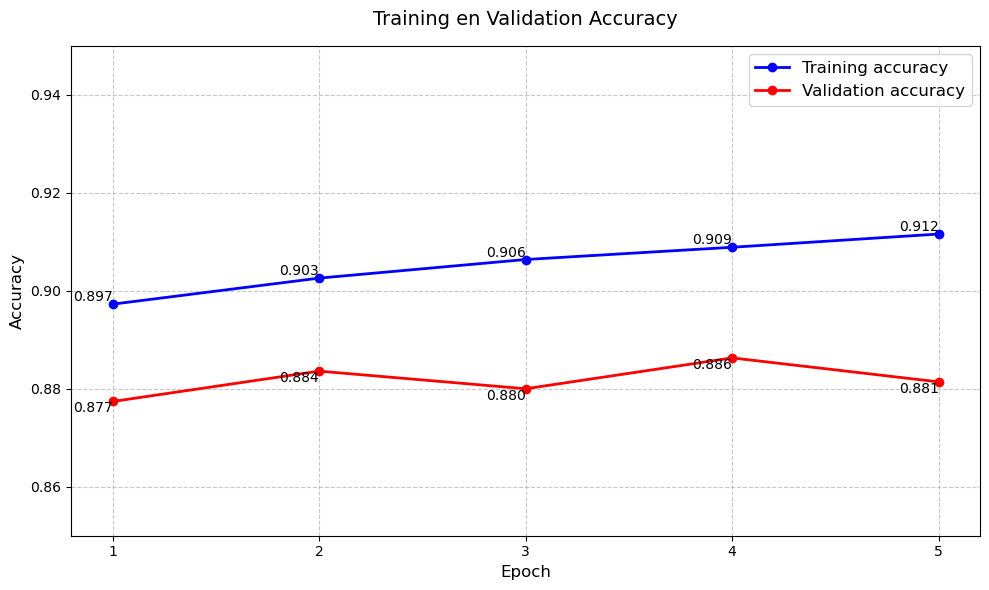

In [57]:
# Plot maken
plt.figure(figsize=(10, 6))

history_dict = history.history
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Training en validatie accuracy plotten
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy', linewidth=2)
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy', linewidth=2)

# Layout verbeteren
plt.title('Training en Validation Accuracy', fontsize=14, pad=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Y-as aanpassen naar relevant bereik
plt.ylim([0.85, 0.95])

# X-as ticks voor elke epoch
plt.xticks(epochs)

# Waardes bij punten
for i, (train_value, val_value) in enumerate(zip(train_acc, val_acc)):
    plt.text(epochs[i], train_value, f'{train_value:.3f}', 
             horizontalalignment='right', verticalalignment='bottom')
    plt.text(epochs[i], val_value, f'{val_value:.3f}', 
             horizontalalignment='right', verticalalignment='top')

plt.tight_layout()
plt.show()

## Regularisatie

Regularisatie is een manier om overfitting tegen te gaan door bepaalde technieken toe te passen op ons netwerk. 

__TODO:__ Hoe kunnen we overfitting tegengaan? Voorzie een van volgende technieken:
- L1 of L2 regularisatie (https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L1L2)
- Early Stopping (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Dropout (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)
- Data augmentatie (https://www.tensorflow.org/tutorials/images/data_augmentation)

In [61]:
'''TODO: implementeer regularisatietechniek en evalueer het model'''


'TODO: implementeer regularisatietechniek en evalueer het model'

## Analyseren en visualiseren

We kunnen gebruik maken van __TensorBoard__ om ons model op een visuele manier te analyseren. Het is een tool die ons toelaat om onder de *loss* en metrics als *accuracy* bij te houden en het model over verschillende trainingsiteraties te visualiseren. Meer info vind je hier: https://www.tensorflow.org/tensorboard/get_started

Om gebruik te kunnen maken van TensorBoard moet de notebook extensie ingeladen worden en dienen we de logs bij te houden.

In [65]:
%load_ext tensorboard

In [66]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%d%m%Y-%H%M%S")

Vervolgens dient de <code>tf.keras.callbacks.TensorBoard</code> callback toegevoegd worden aan het model, door onderstaande codelijn als argument toe te voegen aan <code>Model.fit()</code>

In [68]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [69]:
'''
TODO: voeg de callback toe als argument aan de model.fit() functie.
Tip: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback'''
model.fit(x_train, y_train, epochs = 5, callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9149 - loss: 0.2255
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9188 - loss: 0.2141
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9218 - loss: 0.2083
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9217 - loss: 0.2084
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9255 - loss: 0.1989


We kunnen TensorBoard starten via deze notebook via <code>%tensorboard</code>, waarbij we ook de map meegeven waar de logs werden opgeslagen. 

*Noot: Wanneer je TensorBoard uitvoert, zal je zien dat je links een selectie kan maken van verschillende *runs*. Een run komt overeen met het eenmalig uitvoeren van het <code>model.fit()</code> commando waarbinnen je de callback als parameter hebt meegegeven. Wanneer je dit commando meerder malen uitvoert, beschik je dus ook over meerdere runs die je ook kan visualueren.*

In [71]:
%tensorboard --logdir logs/fit

Volgende dashboards zijn standaard beschikbaar:
- __Scalars__: Laat toe om de loss en accuracy te visualiseren, alsook hyperparameters als de learning rate.
- __Graphs__: Visualisatie van het model.
- __Distribution en histogram__: Distributie van een Tensor gedurende de trainingsperiode. 

<font color='blue'>Wat is de accuracy na 3 epochs?</font>

__Antwoord__: